In [47]:
import csv, cPickle
from numpy import *
import matplotlib.pyplot as plt
import matplotlib
from cycler import cycler

# parse learned descriptors into a dict
def read_descriptors(desc_file):
	desc_map = {}
	f = open(desc_file, 'r')
	for i, line in enumerate(f):
		line = line.split()
		desc_map[i] = line[0]
	return desc_map

# read learned trajectories file
def read_csv(csv_file):
	reader = csv.reader(open(csv_file, 'rb'))
	all_traj = {}
	total_traj = 0
	for index, row in enumerate(reader):
		if index == 0:
			continue
		book = row[0]

		total_traj += 1
		if book not in all_traj:
			all_traj[book] = []
		all_traj[book].append(array(row[1:], dtype='float32'))

	print len(all_traj), total_traj 
	return all_traj

# compute locations to write labels
# only write labels when the 
def compute_centers(max_traj, smallest_shift):
	center_inds = []
	prev_topic = max_traj[0]
	tstart = 0
	for index, topic in enumerate(max_traj):
		if topic != prev_topic:
			center = int((index-tstart) / 2)
			if center > smallest_shift / 2:
				center_inds.append(tstart + center)
			tstart = index
			prev_topic = topic
	center = int((index-tstart) / 2)
	if index - tstart > smallest_shift:
		center_inds.append(tstart + center)

	return center_inds

def viz_csv(rmn_traj, rmn_descs,
	min_length=10,
	smallest_shift=1, max_viz=False,
	fig_dir=None):

	for book in rmn_traj:
		print book
		rtraj = rmn_traj[book]
		if len(rtraj) > min_length and len(rtraj)<150:
			print book
			plt.close()
			rtraj_mat = array(rtraj)

			if max_viz:
				plt.title(book[:100])
				plt.axis('off')

				max_rtraj = argmax(rtraj_mat, axis=1)
				rcenter_inds = compute_centers(max_rtraj, smallest_shift)


				for ind in range(0, len(max_rtraj)):
					topic = max_rtraj[ind]
					plt.axhspan(ind, ind+1, 0.2, 0.4, color=color_list[topic])

					if ind in rcenter_inds or True:
						loc = (0.43, ind + 0.5)
						plt.annotate(rmn_descs[topic], loc, size=15,
							verticalalignment='center',
							color=color_list[topic])


				plt.xlim(0, 1.0)
				plt.arrow(0.1,0,0.0,len(rtraj),
						head_width=0.1, head_length=len(rtraj)/12, lw=3, 
						length_includes_head=True, fc='k', ec='k')

				props = {'ha': 'left', 'va': 'bottom',}
				plt.text(0.0, len(rtraj) / 2, 'TIME', props, rotation=90, size=15)
				props = {'ha': 'left', 'va': 'top',}

			if fig_dir is None:
				plt.show()
			else:
				fig_name = fig_dir + book + '.png'
				print 'figname = ', fig_name
				plt.savefig(fig_name)
#		break




100 12957
24
24
figname =  figs/24.png
25
25
figname =  figs/25.png
26
26
figname =  figs/26.png
27
27
figname =  figs/27.png
20
20
figname =  figs/20.png
21
22
22
figname =  figs/22.png
23
23
figname =  figs/23.png
28
28
figname =  figs/28.png
29
0
0
figname =  figs/0.png
4
4
figname =  figs/4.png
8
59
58
55
55
figname =  figs/55.png
54
54
figname =  figs/54.png
57
56
56
figname =  figs/56.png
51
51
figname =  figs/51.png
50
50
figname =  figs/50.png
53
53
figname =  figs/53.png
52
52
figname =  figs/52.png
88
89
89
figname =  figs/89.png
82
82
figname =  figs/82.png
83
83
figname =  figs/83.png
80
81
81
figname =  figs/81.png
86
86
figname =  figs/86.png
87
87
figname =  figs/87.png
84
84
figname =  figs/84.png
85
85
figname =  figs/85.png
3
7
39
39
figname =  figs/39.png
38
33
33
figname =  figs/33.png
32
31
31
figname =  figs/31.png
30
30
figname =  figs/30.png
37
36
36
figname =  figs/36.png
35
35
figname =  figs/35.png
34
60
61
61
figname =  figs/61.png
62
62
figname =  figs/62.p

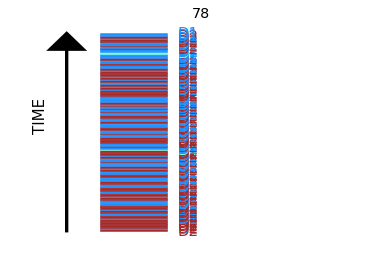

In [48]:
if __name__ == '__main__':

	#wmap, cmap, bmap = cPickle.load(open('data/metadata.pkl', 'rb'))
	rmn_traj = read_csv('models/trajectories.log')  
	rmn_descs = read_descriptors('models/descriptors.log')

	plt.style.use('ggplot')
	color_list = ["peru","dodgerblue","brown","hotpink",
	"aquamarine","springgreen","chartreuse","fuchsia",
	"mediumspringgreen","burlywood","midnightblue","orangered",
	"olive","darkolivegreen","darkmagenta","mediumvioletred",
	"darkslateblue","saddlebrown","darkturquoise","cyan",
	"chocolate","cornflowerblue","blue","red",
	"navy","steelblue","cadetblue","forestgreen",
	"black","darkcyan"]
	color_list += color_list
	plt.rc('axes', prop_cycle=(cycler('color', color_list)))
	viz_csv(rmn_traj, rmn_descs,
		min_length=10, max_viz=True,
		fig_dir='figs/', smallest_shift=1)